## Examen Primer Parcial - Visión para robots
---

#### **Instrucciones** 

1. Lee el notebook completo antes de iniciar.
2. Contesta las celdas de preguntas directamente en el notebook.
3. Para las partes de código, agrega todas las celdas de código que consideres necesarias.
4. El notebook se entrega en Canvas. **Garantiza que hayas ejecutado todas las celdas de código antes de subirlo.**

### Preguntas de desarrollo (5 puntos cada una)
---

Agrega una celda de texto nueva con las respuestas.

1. Se tiene una imagen RGB de 512 de ancho, y 324 de alto. ¿Cuántos pixeles totales tiene la imagen?
2. Describe qué es un espacio de color. ¿Cuál es la diferencia entre el espacio HSV y RGB?
3. ¿Qué son, para qué sirven, y cómo se representan los filtros?
4. Busca dos imágenes en línea: una que sea principalmente de alta frecuencia, y otra que sea de baja frecuencia. Carga las dos imágenes al notebook en un mismo subplot, y describe cuál es la diferencia entre una imagen con alta frecuencia, y otra con baja frecuencia.
5. ¿Qué son las operaciones morfológicas? ¿Cuál es la diferencia entre open, close, dilate, y erode?

1. 165,888 pixeles

2. El espacio HSV es determinado por los valores Hue, Saturation y Value; mientras que el espacio RGB es consiste de la combinación de      colores Rojo, Verde y Azul. Los valores de los arreglos de cada pixel contienen esos valores respectivamente. 

3. Los filtros son manipuladores de una imagen. Estos se utilizan para cambiar la apariencia de una imagen de manera homogénea. Se representan como una matriz y se recorren por la imagen para que, con una fórmula, cada pixel de la imagen sea cambiada.  

4. Una imagen con alta frecuencia representa cambios repentinos o fuertes de color, mientras que una imagen de baja frecuencia represente cambios leves de color (ejercicio en siguiente panel).

5. A partir de ellas se puede eliminar el ruido de una imagen binaria. 
    open: Elimina ruido de una figura, la hace aparentar más limpia. 
    close: Rellena agujeros pequeños de una figura, siendo escencialmente lo contrario a open. 
    dilate: Expande o amplia la región en donde se está trabajando o escencialmente amplia los bordes de una figura. 
    erode: Realiza un adelgazamiento de la región en donde se está trabajando o escencialmente de los bordes de una figura. 

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os

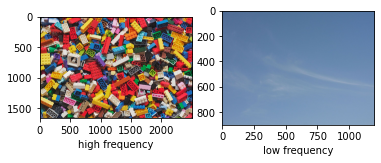

In [2]:
# pregunta 4

im_dir = 'images/question4/'
files = os.listdir(im_dir)
im_list = []
titles_list = ['high frequency', 'low frequency']

for i in range(len(files)):
    file_dir = im_dir + files[i]
    imgBGR = cv2.imread(file_dir)
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    im_list.append(imgRGB)
    img_ext = files[i]
    plt.subplot(1, 2, i + 1)
    plt.xlabel(titles_list[i])
    plt.imshow(im_list[i])

plt.show()

### Preguntas de código
---

Imports básicos y ruta de las imágenes de prueba.

In [3]:
%matplotlib inline

image_dir = "images/license_plates"

#### Ejercicio 1 (15 puntos)

Crea una imagen de 21 por 21 pixeles, y agrega el código necesario para crear y mostrar el siguiente resultado:

![Examen 1](images/ex1.png)

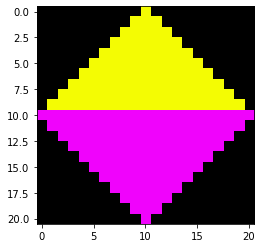

In [50]:
# Replicate image
n = int(21 / 2)
im = np.zeros((21, 21, 3), dtype=np.uint8)
yellow = [244, 252, 3]
pink = [240, 3, 252]

# yellow
for i in range(0, n):
    for j in range(0, i + 1):
        im[i, j + n] = yellow
for i in range(0, n):
    for j in range(0, n):
        im[i, j] = yellow
for i in range(0, n):
    for j in range(0, i + 1):
        im[j, n - i - 1] = [0,0,0]

# pink
for i in range(0, n + 1):
    for j in range(0, i + 1):
        im[j + n, i] = pink
for i in range(0, n):
    for j in range(0, i + 1):
        im[j + n, n - i + n] = pink

plt.imshow(im)

#### Ejercicio 2 (15 puntos)

Crea el código para implementar un filtro gaussiano y aplicalo a la imagen **peppers.tiff**. **Nota: No uses las funciones filter2d de openCV.**

El filtro es el siguiente: ![GaussianBlur](images/gaussian_blur.png). 



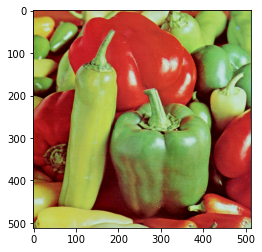

In [5]:
peppers = cv2.imread('images/peppers.tiff')
peppers = cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB)

plt.imshow(peppers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


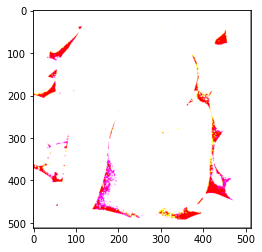

In [6]:
# gaussian filter

k = (1 / 16) * np.array([
                [1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]
                ]) 

res = np.zeros(peppers.shape)

for y in range(1, peppers.shape[0] - 1):
    for x in range(1, peppers.shape[1] - 1):
        sum1 = k[0, 0] * peppers[y - 1, x - 1, 0] + k[0, 1] * peppers[y - 1, x, 0] + k[0, 2] * peppers[y - 1, x + 1, 0] + k[1, 0] * peppers[y, x - 1, 0] + k[1, 1] * peppers[y, x, 0] + k[1, 2] * peppers[y, x + 1, 0] + k[2, 0] * peppers[y + 1, x - 1, 0] + k[2, 1] * peppers[y + 1, x, 0] + k[2, 2] * peppers[y + 1, x + 1, 0]
        res[y, x, 0] = sum1
            
        sum2 = k[0, 0] * peppers[y - 1, x - 1, 1] + k[0, 1] * peppers[y - 1, x, 1] + k[0, 2] * peppers[y - 1, x + 1, 1] + k[1, 0] * peppers[y, x - 1, 1] + k[1, 1] * peppers[y, x, 1] + k[1, 2] * peppers[y, x + 1, 1] + k[2, 0] * peppers[y + 1, x - 1, 1] + k[2, 1] * peppers[y + 1, x, 1] + k[2, 2] * peppers[y + 1, x + 1, 1]
        res[y, x, 1] = sum2

        sum3 = k[0, 0] * peppers[y - 1, x - 1, 2] + k[0, 1] * peppers[y - 1, x, 2] + k[0, 2] * peppers[y - 1, x + 1, 2] + k[1, 0] * peppers[y, x - 1, 2] + k[1, 1] * peppers[y, x, 2] + k[1, 2] * peppers[y, x + 1, 2] + k[2, 0] * peppers[y + 1, x - 1, 2] + k[2, 1] * peppers[y + 1, x, 2] + k[2, 2] * peppers[y + 1, x + 1, 2]
        res[y, x, 2] = sum3
        
plt.imshow(res)


#### Ejercicio 3 (50 puntos)

Crea un pipeline de visión para segmentar los números de las placas de las imágenes que están en la carpeta **images/licene_plates**. Revisa las celdas siguientes para completar las partes que se solicitan. Además de las celdas con funciones predefinidas que tienes que completar, puedes agregar todas las celdas y funciones que consideres necesarias.

El resultado esperado es el siguiente:

![Expected output](images/license_plates/output2.png)

En el plot final, muestra tanto las imágenes originales, como los contornos solamente de la zona donde está la placa.

Las imágenes se pueden ver en la siguiente celda:

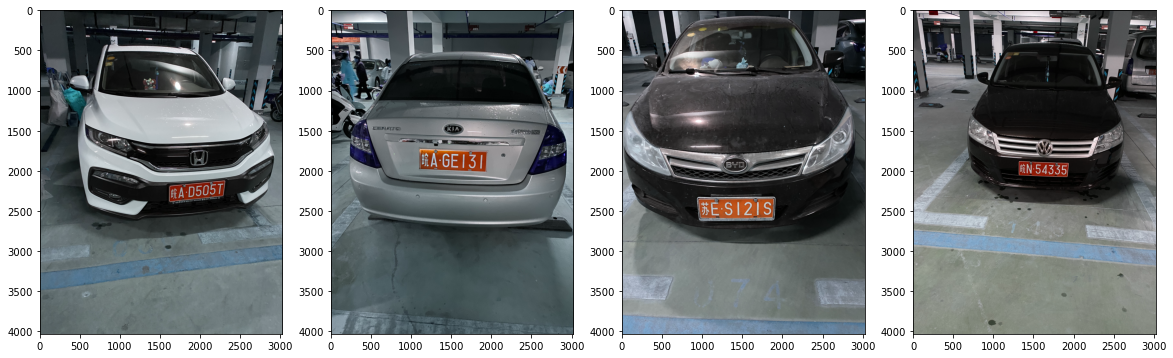

In [7]:
images = []

for i in range(1, 5):
    image = cv2.imread(f'{image_dir}/0{i}.jpeg')
    images.append(image)

f, subplots = plt.subplots(1,4, figsize=(20,10))

for i in range(4):
    subplots[i].imshow(images[i])


**Define una función con el preprocesamiento que consideras necesario aplicar a todas las imágenes** 

In [8]:
def preprocess(img):

    lower_red_1 = np.array([0,200,20])
    higher_red_1 = np.array([200,255,255])
    lower_red_2 = np.array([175, 180, 20])
    higher_red_2 = np.array([179, 255, 20]) 

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask_red_1 = cv2.inRange(hsv, lower_red_1, higher_red_1)
    mask_red_2 = cv2.inRange(hsv, lower_red_2, higher_red_2)

    mask_red = cv2.add(mask_red_1, mask_red_2)

    return mask_red


**Muestra una figura con el preprocesamiento que aplicaste a las imágenes**

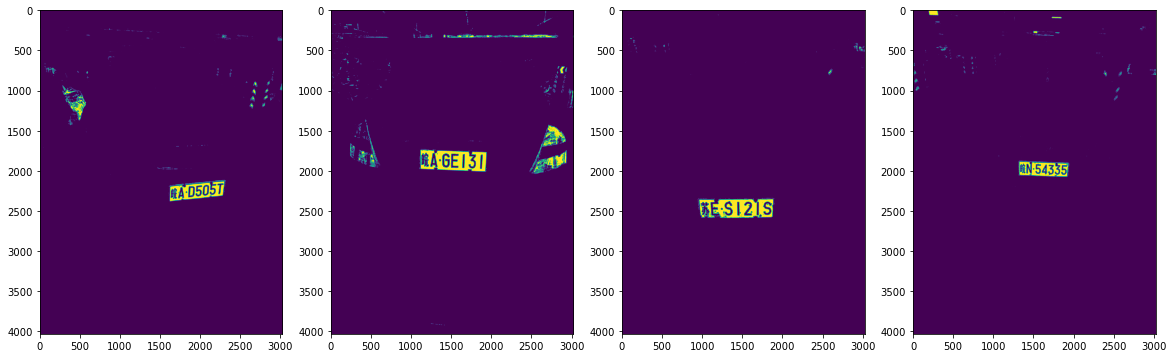

In [9]:
f, subplots = plt.subplots(1, 4, figsize=(20,10))
img1 = preprocess(images[0])
img2 = preprocess(images[1])
img3 = preprocess(images[2])
img4 = preprocess(images[3])

subplots[0].imshow(img1)
subplots[1].imshow(img2)
subplots[2].imshow(img3)
subplots[3].imshow(img4)


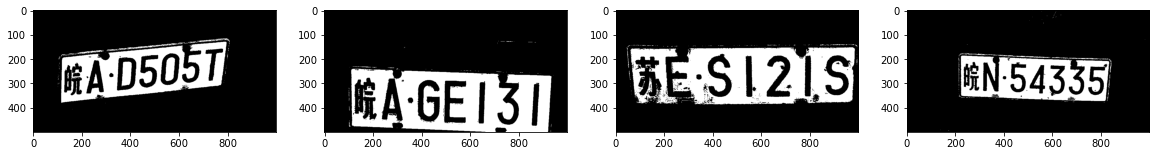

In [10]:
cr_img_1 = img1[2000:2500, 1500:2500]
cr_img_2 = img2[1500:2000, 1000:2000]
cr_img_3 = img3[2200:2700, 900:1900]
cr_img_4 = img4[1700:2200, 1100:2100]

f, subplots = plt.subplots(1, 4, figsize=(20,10))

subplots[0].imshow(cr_img_1, cmap="gray")
subplots[1].imshow(cr_img_2, cmap="gray")
subplots[2].imshow(cr_img_3, cmap="gray")
subplots[3].imshow(cr_img_4, cmap="gray")

**Crea el código necesario para aplicar el procesamiento a las imágenes. El objetivo es obtener los bordes de los números de las placas** 

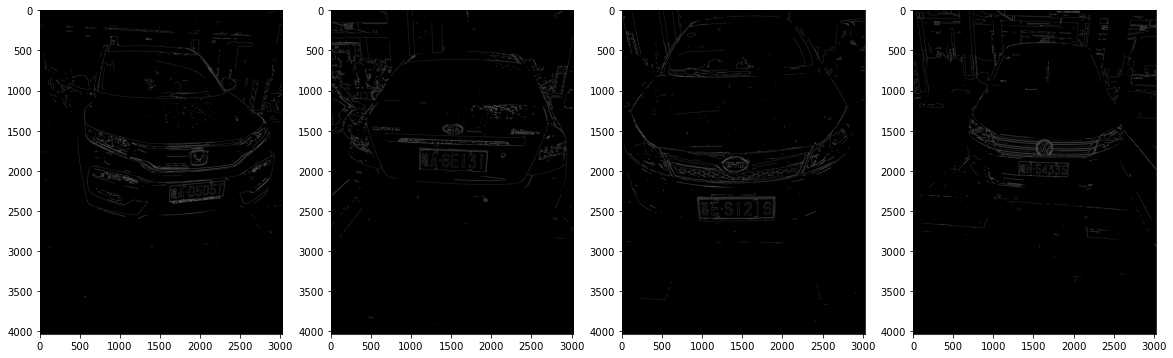

In [11]:
# processing

# Note: saved images from previeus code
img1 = cv2.imread('img1.png')
img2 = cv2.imread('img2.png')
img3 = cv2.imread('img3.png')
img4 = cv2.imread('img4.png')

edges = [img1, img2, img3, img4]

def edges(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
    sobel_x = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
    sobel_y = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
    sobel_xy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
    return edges

f, subplots = plt.subplots(1, 4, figsize=(20,10))
subplots[0].imshow(edges(images[0]), cmap="gray")
subplots[1].imshow(edges(images[1]), cmap="gray")
subplots[2].imshow(edges(images[2]), cmap="gray")
subplots[3].imshow(edges(images[3]), cmap="gray")


**Completa la siguiente función: El parámetro es una de las imágenes en escala de grises o blanco y negro, y el resultado es una sub-imagen que representa solamente el área de la placa**

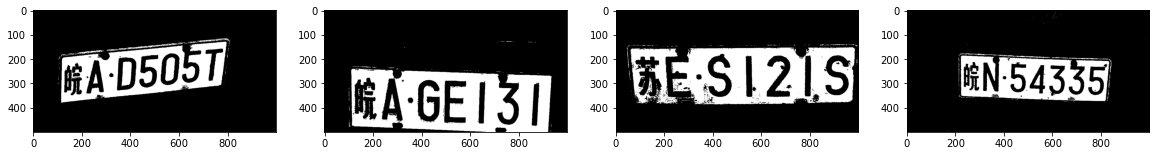

In [12]:
def roi(image):
    
    min_x = 0
    max_x = 1000
    min_y = 0
    max_y = 500

    return image[min_y:max_y, min_x:max_x]

example1 = roi(img1)
example2 = roi(img2)
example3 = roi(img3)
example4 = roi(img4)

f, subplots = plt.subplots(1, 4, figsize=(20,10))
subplots[0].imshow(example1, cmap="gray")
subplots[1].imshow(example2, cmap="gray")
subplots[2].imshow(example3, cmap="gray")
subplots[3].imshow(example4, cmap="gray")

**Crea el código necesario para mostar una figura con las imágenes originales en la primer fila, y con el contorno de los números de las placas en la segunda fila**

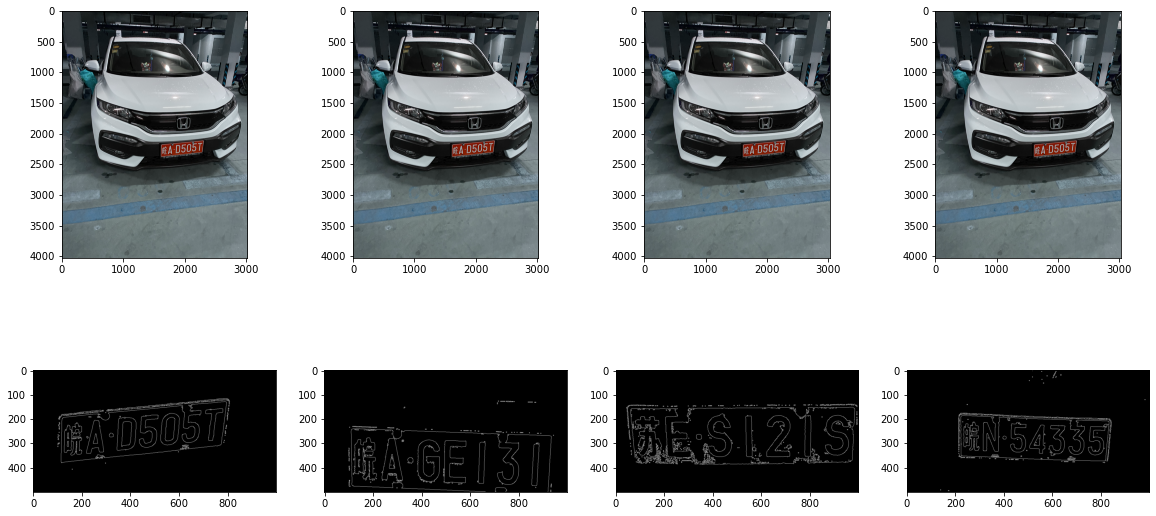

In [14]:
origin_1 = cv2.imread('images/license_plates/01.jpeg')
origin_2 = cv2.imread('images/license_plates/02.jpeg')
origin_3 = cv2.imread('images/license_plates/03.jpeg')
origin_4 = cv2.imread('images/license_plates/04.jpeg')

f, subplots = plt.subplots(2, 4, figsize=(20,10))

subplots[0, 0].imshow(origin_1)
subplots[0, 1].imshow(origin_1)
subplots[0, 2].imshow(origin_1)
subplots[0, 3].imshow(origin_1)

subplots[1, 0].imshow(edges(example1), cmap="gray")
subplots[1, 1].imshow(edges(example2), cmap="gray")
subplots[1, 2].imshow(edges(example3), cmap="gray")
subplots[1, 3].imshow(edges(example4), cmap="gray")